# Keras 

> pip install tensorflow
> 
> pip install keras

In [1]:
from keras import models 
from keras import layers
import matplotlib.pyplot as plt 
from tensorflow import keras

In [2]:
from tensorflow.keras.datasets import mnist
from pathlib import Path

from keras.utils import to_categorical

In [22]:
import numpy as np

In [29]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# 1. Load the data (without proxy)

In [3]:
(train_images, train_labels) , (test_images, test_labels) =  mnist.load_data()

# 2. Load the data manually (with Proxy)

In [4]:
file_path = Path("./datasets/mnist.npz").absolute()
(train_images, train_labels) , (test_images, test_labels) =  mnist.load_data(path=file_path)

# Exploring the data

In [5]:
print(train_images.shape)
print(test_images.shape)

print(train_labels.shape)
print(test_labels.shape)

(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)


# Visualize some data

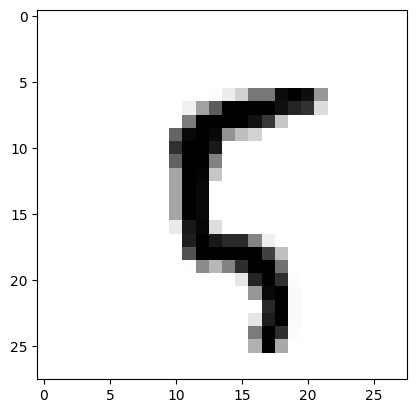

In [6]:
IMAGE_INDEX = 100

digit = train_images[IMAGE_INDEX]
plt.imshow(digit, cmap= plt.cm.binary)
plt.show()

In [7]:
print("Label:", train_labels[IMAGE_INDEX])

Label: 5


# Preparation Phase

## 1. Reshape the images from 28x28 to 784x1

In [8]:
train_images = train_images.reshape((60000,784))
print(train_images.shape)

(60000, 784)


In [9]:
test_images = test_images.reshape((10000,784))
print(test_images.shape)

(10000, 784)


## 2. Scale the input values from 0-255 --> 0-1

In [10]:
train_images = train_images.astype("float32") / 255
test_images = test_images.astype("float32") / 255

## 3. Prepare the label --> One hot encoding

In [11]:
train_labels = to_categorical(train_labels)

In [12]:
print("Label:", train_labels[IMAGE_INDEX])

Label: [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


# Build the network

In [13]:
model = models.Sequential([
    keras.Input(shape=(784,)), # Input Layer
    keras.layers.Dense(512, activation= "sigmoid"), # 1. Hidden Layer              
    keras.layers.Dense(10, activation= "sigmoid"), # Output Layer    
])

## Get Network Summary

In [14]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 512)            │       401,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 407,050 (1.55 MB)

 Trainable params: 407,050 (1.55 MB)

 Non-trainable params: 0 (0.00 B)

## Compile / Configure the network
- loss: how bad is my model --> mse, mae, etc.
- optimizer: mechanism to update the weights and biases
- metrics: performance of my model --> accuracy

In [15]:
model.compile(loss = "categorical_crossentropy", optimizer= "rmsprop", metrics= ["accuracy"])

## Train the model

In [16]:
# model.fit(train_images, train_labels, epochs= 5, shuffle= True)
# history = model.fit(train_images, train_labels, epochs= 5, shuffle= True, validation_data=(val_images, val_labels))
history = model.fit(train_images, train_labels, epochs= 5, shuffle= True, validation_split= 0.1)

Epoch 1/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8544 - loss: 0.5328 - val_accuracy: 0.9422 - val_loss: 0.2031
Epoch 2/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9369 - loss: 0.2133 - val_accuracy: 0.9610 - val_loss: 0.1386
Epoch 3/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9579 - loss: 0.1452 - val_accuracy: 0.9678 - val_loss: 0.1089
Epoch 4/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9700 - loss: 0.1053 - val_accuracy: 0.9732 - val_loss: 0.0912
Epoch 5/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9744 - loss: 0.0847 - val_accuracy: 0.9757 - val_loss: 0.0877


# Plot the accuracy

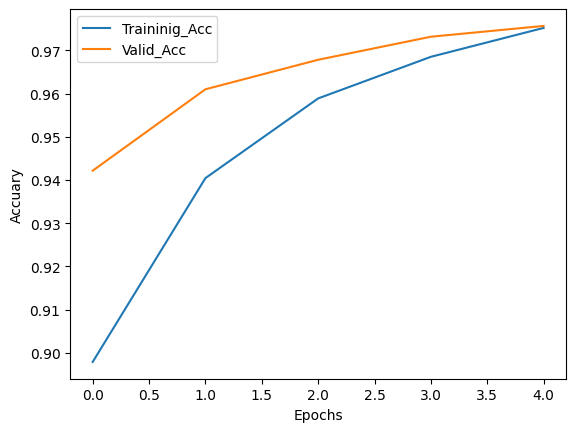

In [19]:
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.legend(["Traininig_Acc", "Valid_Acc"])
plt.xlabel("Epochs")
plt.ylabel("Accuary")
plt.show()

# Predicitons using Test Data

In [20]:
predictions = model.predict(x= test_images)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [21]:
for i in predictions:
    print(i)

[1.4175642e-11 3.4127529e-13 7.3655100e-09 1.1510348e-07 1.6988649e-12
 1.8525208e-10 2.2593095e-16 1.3001325e-03 3.1384859e-10 1.0167083e-09]
[4.7190092e-09 1.0446398e-06 2.5152426e-02 7.3803346e-07 1.2619895e-14
 3.2375034e-08 1.1205774e-07 1.2195327e-14 1.6905705e-08 1.0070596e-14]
[2.0685199e-15 6.9341945e-07 2.7838659e-10 4.0580157e-11 9.1163611e-13
 2.8838662e-11 4.6178352e-12 2.4571750e-10 1.0938225e-10 1.4416868e-12]
[5.45167085e-03 1.38764861e-10 2.51439133e-06 1.09826225e-07
 1.21230057e-08 1.74877314e-07 4.52867397e-07 5.36261986e-08
 1.45119339e-09 1.36286815e-07]
[8.2680893e-12 3.1960186e-14 8.2610363e-10 3.7122480e-12 1.1508627e-05
 8.1203086e-11 1.5417813e-10 3.6798393e-09 2.2718827e-10 1.3850323e-08]
[1.5680360e-14 9.2701539e-06 2.3445321e-10 1.8061797e-10 1.0123361e-11
 6.3224469e-12 6.6145386e-13 2.7116684e-08 2.3153132e-10 2.6624184e-11]
[1.0174609e-13 1.1467371e-12 1.5594187e-11 2.3828238e-11 4.3101431e-04
 1.6873813e-08 1.2920005e-10 3.9667409e-08 2.2479948e-07 1.5

In [23]:
rounded_predictions = np.argmax(predictions, axis = 1) # axis = 1 --> througt rows

for i in rounded_predictions:
    print(i)

7
2
1
0
4
1
4
9
6
9
0
6
9
0
1
5
9
7
3
4
9
6
6
5
4
0
7
4
0
1
3
1
3
4
7
2
7
1
2
1
1
7
4
2
3
5
1
2
4
4
6
3
5
5
6
0
4
1
9
5
7
8
9
3
7
4
6
4
3
0
7
0
2
9
1
7
3
2
9
7
7
6
2
7
8
4
7
3
6
1
3
6
9
3
1
4
1
7
6
9
6
0
5
4
5
9
2
1
9
4
8
7
3
9
7
4
4
4
9
2
5
4
7
6
7
9
0
5
8
5
6
6
5
7
8
1
0
1
6
4
6
7
3
1
7
1
8
2
0
2
9
8
5
5
1
5
6
0
3
4
4
6
5
4
6
5
4
5
1
4
4
7
2
3
2
7
1
8
1
8
1
8
5
0
8
9
2
5
0
1
1
1
0
9
0
3
1
6
4
2
3
6
1
1
1
3
9
5
2
9
4
5
9
3
9
0
3
6
5
5
7
2
2
7
1
2
8
4
1
7
3
3
8
8
7
9
2
2
4
1
5
5
8
7
2
3
0
2
4
2
4
1
9
5
7
7
2
8
2
0
8
5
7
7
9
1
8
1
8
0
3
0
1
9
9
4
1
8
2
1
2
9
7
5
9
2
6
4
1
5
8
2
9
2
0
4
0
0
2
8
4
7
1
2
4
0
2
7
4
3
3
0
0
3
1
9
6
5
2
5
7
7
9
3
0
4
2
0
7
1
1
2
1
5
3
3
9
7
8
6
3
6
1
3
8
1
0
5
1
3
1
5
5
6
1
8
5
1
7
9
4
6
2
2
5
0
6
5
6
3
7
2
0
8
8
5
4
1
1
4
0
7
3
7
6
1
6
2
1
9
2
8
6
1
9
5
2
5
4
4
2
8
3
8
2
4
5
0
3
1
7
7
5
7
9
7
1
9
2
1
4
2
9
2
0
4
9
1
4
8
1
8
4
5
9
8
8
3
7
6
0
0
3
0
2
0
6
4
8
3
3
3
2
3
9
1
2
6
8
0
5
6
6
6
3
8
8
2
7
5
8
9
6
1
8
4
1
2
5
9
1
9
7
5
4
0
8
9
7
1
0
5
2
3
7
2
9
4
0
6


## Compare between thruth data and predicted data

In [28]:
IMAGES_INDEX = 1500 

print(test_labels[IMAGES_INDEX])
print(rounded_predictions[IMAGES_INDEX])

7
1


# Confusion Matrix

In [30]:
cm = confusion_matrix(test_labels, rounded_predictions)

In [32]:
cm

array([[ 965,    0,    1,    1,    0,    3,    5,    3,    2,    0],
       [   0, 1126,    4,    0,    0,    1,    1,    2,    1,    0],
       [   4,    0, 1014,    2,    2,    0,    1,    6,    3,    0],
       [   0,    0,   10,  982,    0,    4,    0,    9,    4,    1],
       [   1,    0,    8,    1,  955,    0,    3,    5,    3,    6],
       [   3,    1,    0,    9,    1,  866,    7,    1,    3,    1],
       [   6,    3,    3,    0,    2,    6,  933,    1,    4,    0],
       [   0,    6,   12,    2,    0,    1,    0, 1003,    1,    3],
       [   3,    0,    6,    8,    3,    5,    4,    6,  939,    0],
       [   5,    6,    3,   11,   21,   13,    1,   20,    7,  922]],
      dtype=int64)

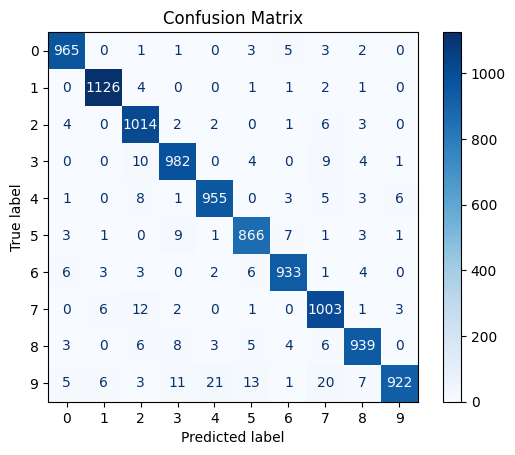

In [31]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.arange(10))
disp.plot(cmap='Blues', values_format='d')
plt.title('Confusion Matrix')
plt.show()

# Evaluate the model

In [33]:
loss_val, acc = model.evaluate(train_images, train_labels)

print("Loss:", loss_val) # not so important
print("Accuracy:", acc) # Accuracy 97,8 %

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9805 - loss: 0.0679
Loss: 0.07277941703796387
Accuracy: 0.9786333441734314


# Save the model

In [34]:
model.save("./models/mnist1.h5")


In [35]:
model.save("./models/mnist1.keras")

In [40]:
model.save_weights("./models/mnist1_weights_v1.weights.h5")

# Load The model

In [41]:
model2 = models.load_model("./models/mnist1.keras")

model2.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 512)            │       401,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 814,102 (3.11 MB)

 Trainable params: 407,050 (1.55 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 407,052 (1.55 MB)